<a href="https://colab.research.google.com/github/rodela17/ORES-5160-02/blob/main/Visualizations_using_Python_and_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

palet_c = sns.color_palette(palette=['#FF796C', '#7BC8F6'])
palet_a = sns.color_palette(palette=['red', '#15B01A'])

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving clinical_records_dataset.csv to clinical_records_dataset.csv
User uploaded file "clinical_records_dataset.csv" with length 12239 bytes


In [3]:
heart_data = pd.read_csv("clinical_records_dataset.csv")

In [4]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'cat_cols: {cat_cols}')
    print(f'num_cols: {num_cols}')
    print(f'cat_but_car: {cat_but_car}')
    print(f'num_but_cat: {num_but_cat}')

    return cat_cols, num_but_cat, cat_but_car, num_cols


In [6]:
cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(heart_data)

cat_cols: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
num_cols: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_but_car: []
num_but_cat: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [7]:
Y_N = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking' ]

for i in Y_N:
    heart_data[i] = np.where(heart_data[i] == 1, 'Yes', 'No')

In [8]:
heart_data["sex"] = np.where(heart_data["sex"] == 1, 'Male', 'Female')

In [9]:
heart_data["DEATH_EVENT"] = np.where(heart_data["DEATH_EVENT"] == 1, 'Death', 'Live')

In [10]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Death
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Death
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Death
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Death
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Death


In [11]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

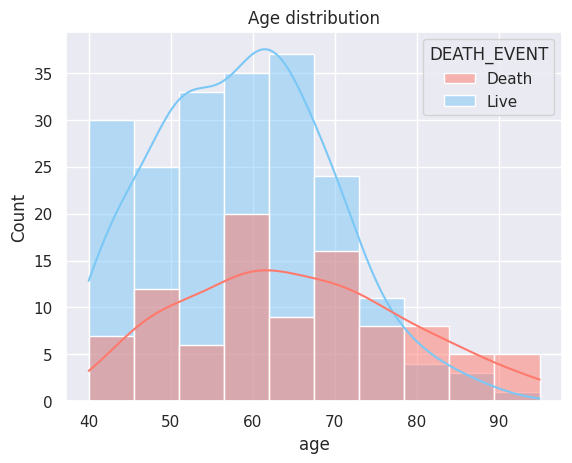

In [12]:
sns.set(style="darkgrid")
sns.histplot(x="age", hue="DEATH_EVENT", data=heart_data, kde=True, palette=palet_c)
plt.title("Age distribution")
plt.show()

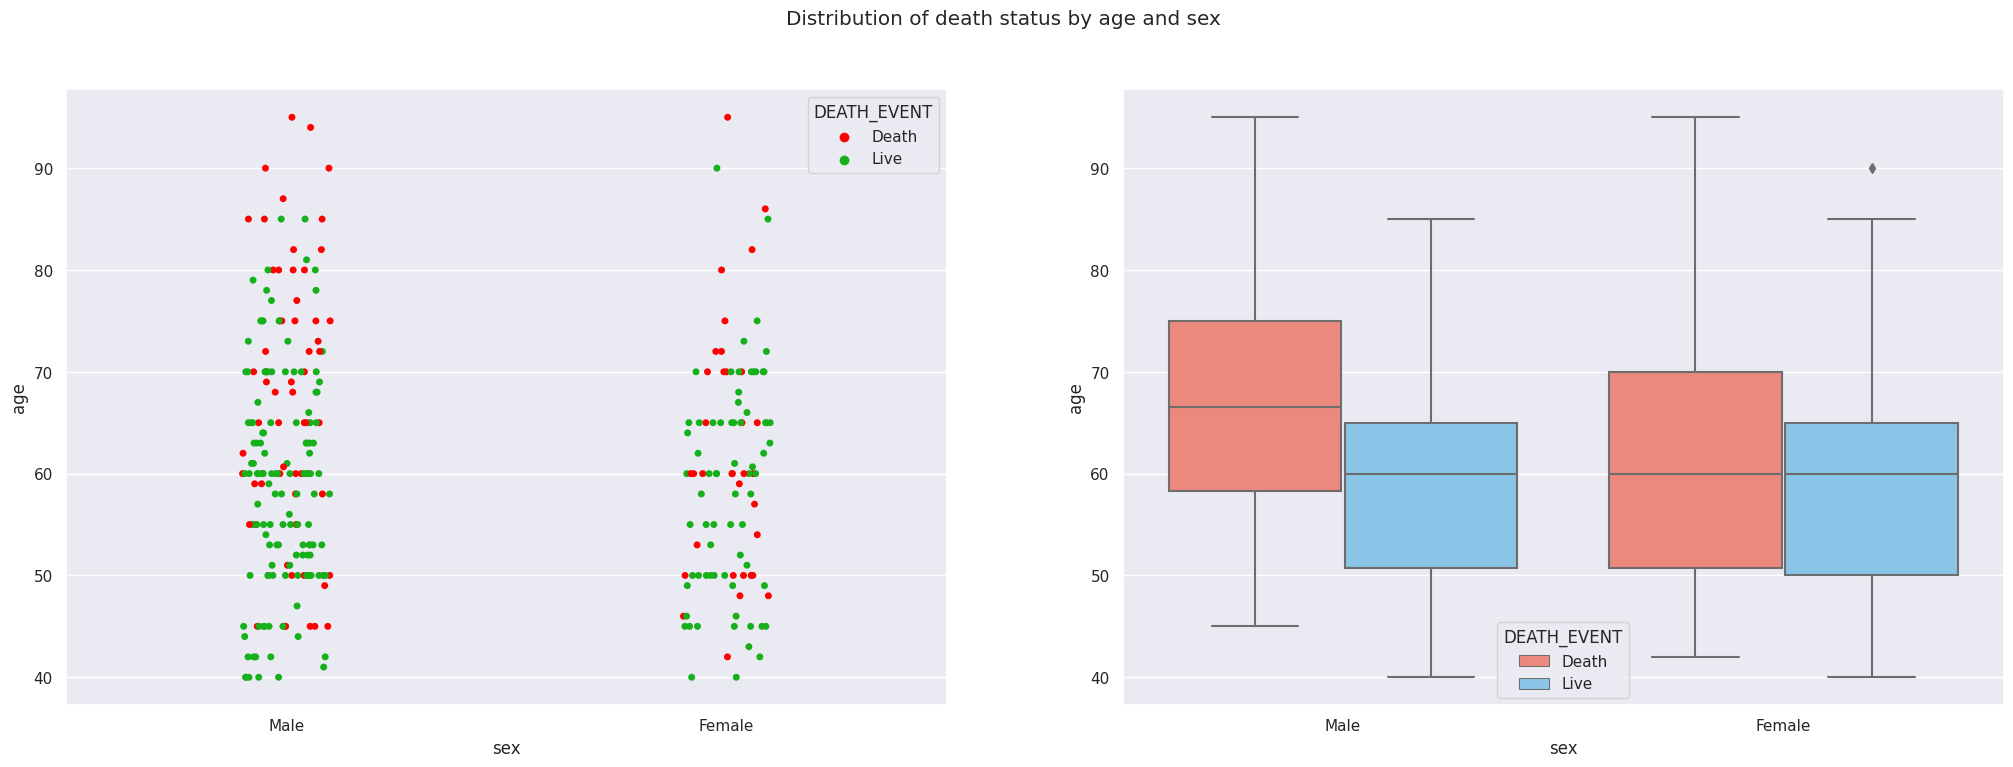

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))
fig.suptitle('Distribution of death status by age and sex')
sns.set(style="darkgrid")
sns.stripplot(ax=axes[0], x="sex", y="age", hue="DEATH_EVENT", data=heart_data, palette=palet_a)
sns.boxplot(ax=axes[1], x="sex", y="age", hue="DEATH_EVENT", data=heart_data, palette=palet_c)
plt.show()

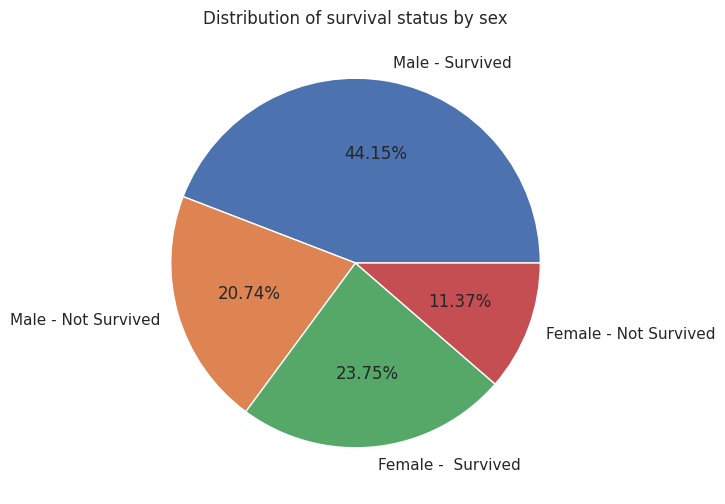

In [14]:
male = heart_data.loc[heart_data["sex"]=="Male"]
female = heart_data.loc[heart_data["sex"]=="Female"]

male_survi = male.loc[heart_data["DEATH_EVENT"]=="Live"]
male_not = male.loc[heart_data["DEATH_EVENT"]=="Death"]
female_survi = female.loc[heart_data["DEATH_EVENT"]=="Live"]
female_not = female.loc[heart_data["DEATH_EVENT"]=="Death"]

label = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]

values = [len(male_survi), len(male_not), len(female_survi), len(female_not)]

plt.figure(figsize=(10,6))
plt.pie(values, labels=label,autopct='%1.2f%%')
plt.title("Distribution of survival status by sex")
plt.show()

Text(0.5, 1.0, 'Distribution of survival status by age and ejection fraction')

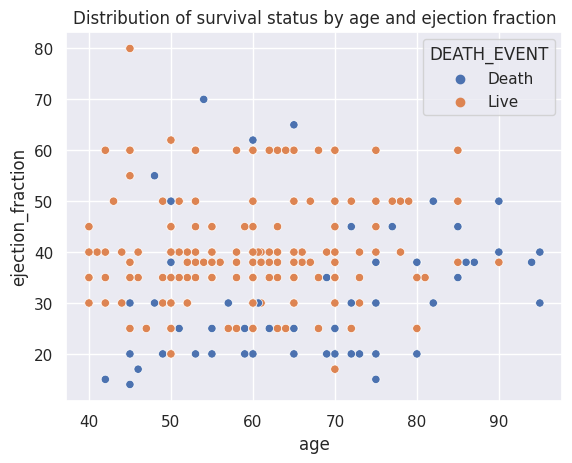

In [ ]:
sns.scatterplot(data = heart_data, x = 'age', y = 'ejection_fraction', hue = 'DEATH_EVENT')
plt.title("Distribution of survival status by age and ejection fraction")

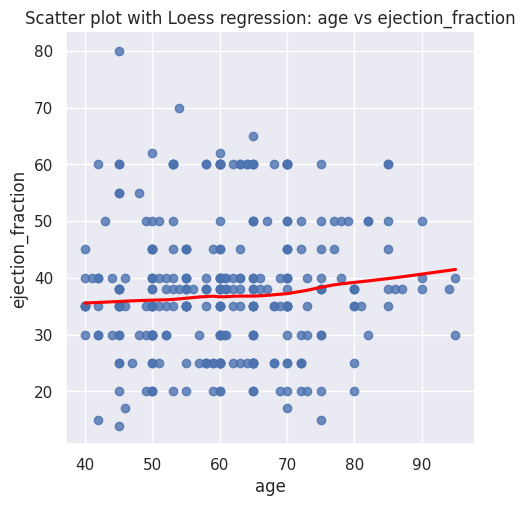

In [ ]:
column1 = 'age'
column2 = 'ejection_fraction'

# Scatter plot with loess regression line
sns.lmplot(x=column1, y=column2, data=heart_data, lowess=True, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter plot with Loess regression: {column1} vs {column2}')

# Show the plot
plt.show()


In [ ]:
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula = 'y ~ x'


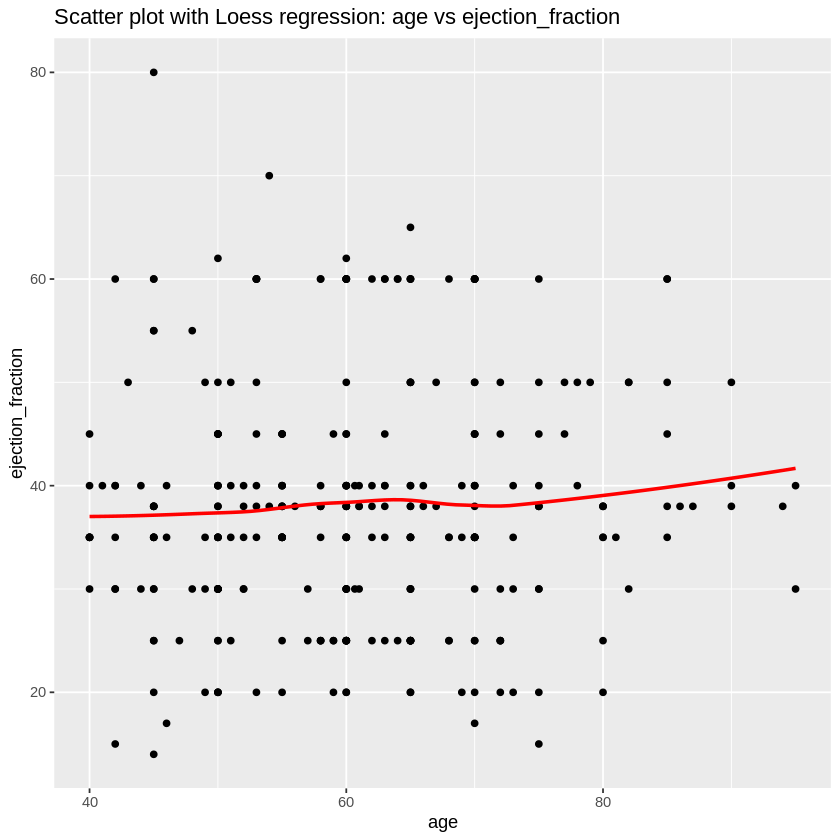

In [ ]:
# Load the ggplot2 library
library(ggplot2)

# Load your data into a data frame
heart_data <- read.csv("clinical_records_dataset.csv")

# Choose two columns for visualization
column1 <- 'age'
column2 <- 'ejection_fraction'

# Create a scatter plot with loess regression line
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


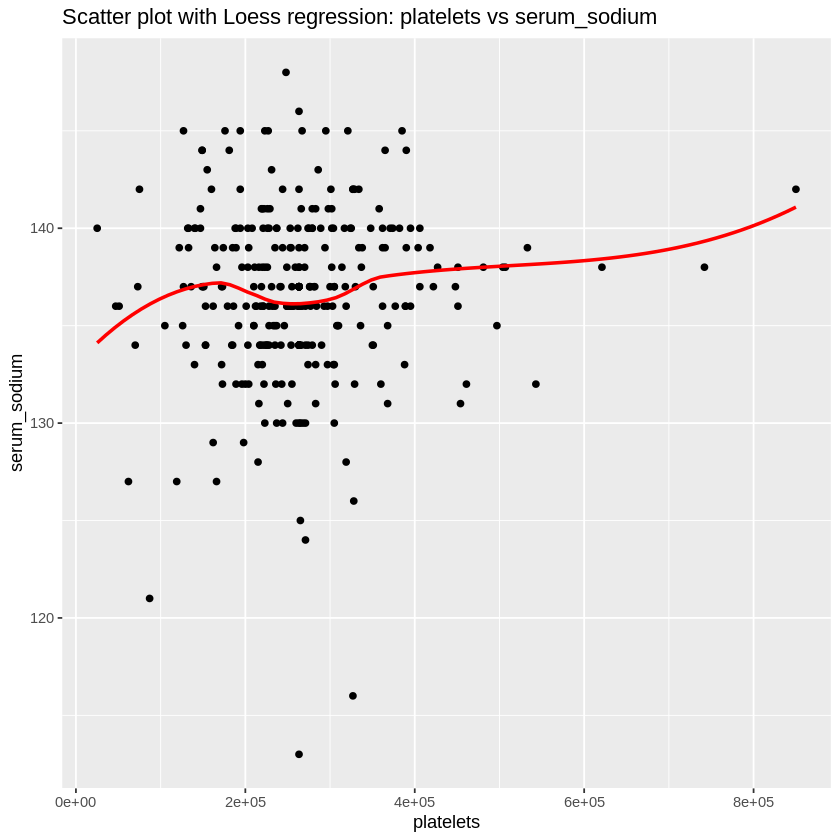

In [ ]:
# Load the ggplot2 library
library(ggplot2)

# Load your data into a data frame
heart_data <- read.csv("clinical_records_dataset.csv")

# Choose two columns for visualization
column1 <- 'platelets'
column2 <- 'serum_sodium'

# Create a scatter plot with loess regression line
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


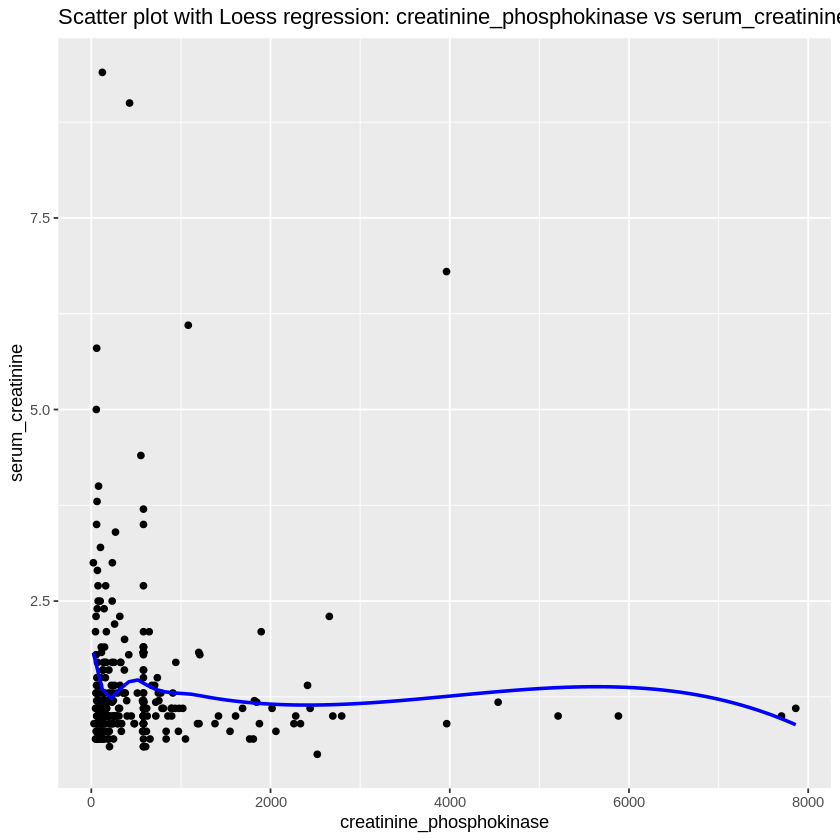

In [ ]:
# Assuming 'heart_data' is your data frame
library(ggplot2)

# Choose two different columns for visualization
column1 <- 'creatinine_phosphokinase'
column2 <- 'serum_creatinine'

# Create a scatter plot with loess regression line
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'blue') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


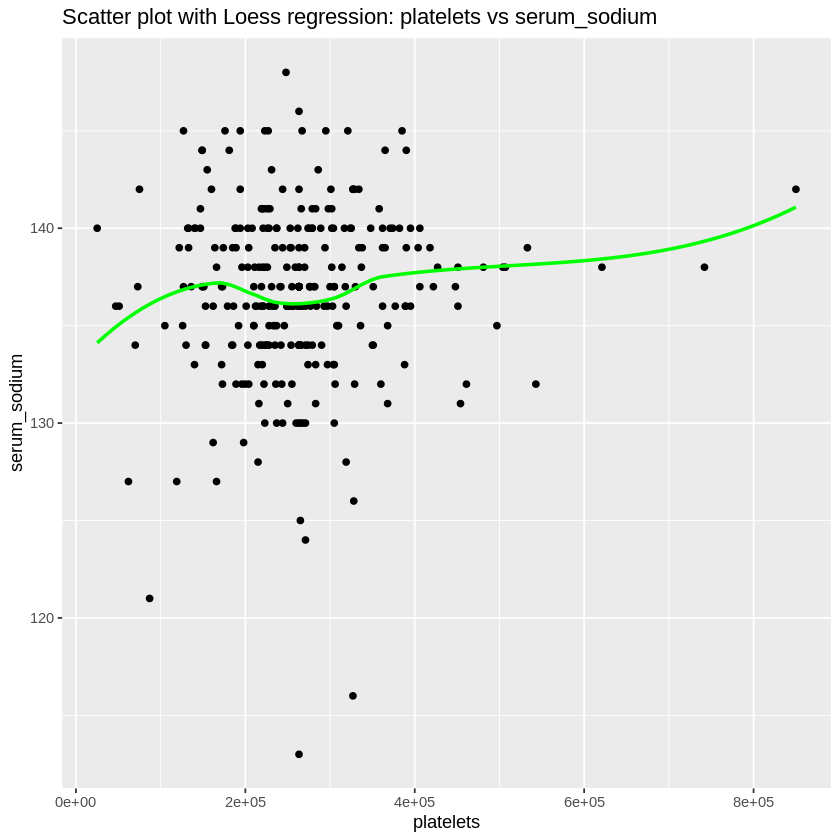

In [ ]:
# Assuming 'heart_data' is your data frame
library(ggplot2)

# Choose two different columns for visualization
column1 <- 'platelets'
column2 <- 'serum_sodium'

# Create a scatter plot with loess regression line
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'green') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


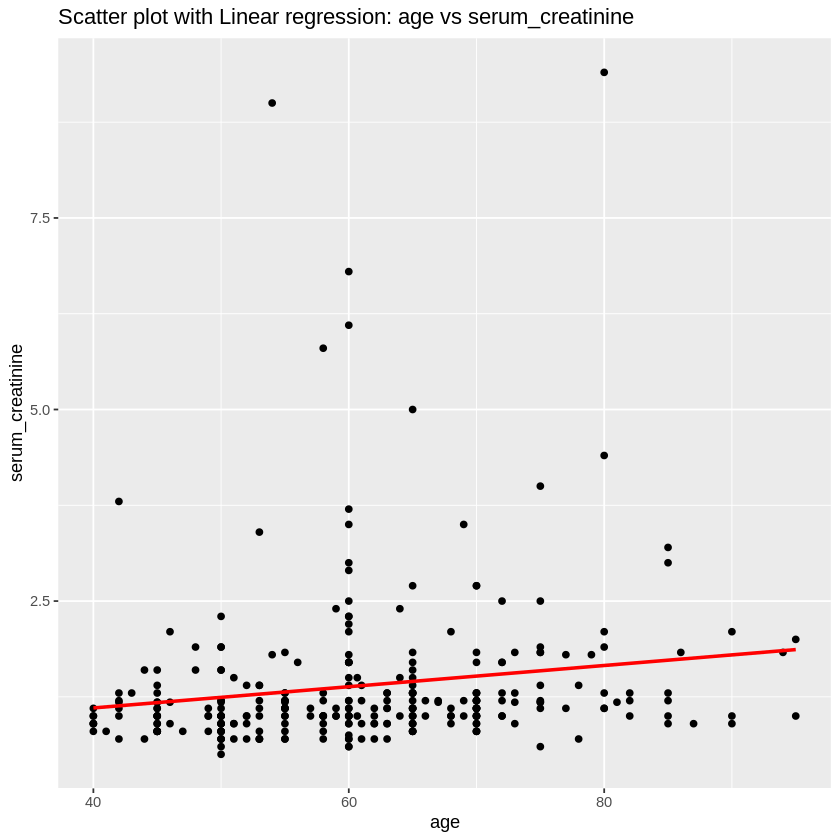

In [ ]:
# Assuming 'heart_data' is your data frame
library(ggplot2)

# Choose two columns for visualization
column1 <- 'age'
column2 <- 'serum_creatinine'

# Create a scatter plot with a linear regression line
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'lm', se = FALSE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Linear regression:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


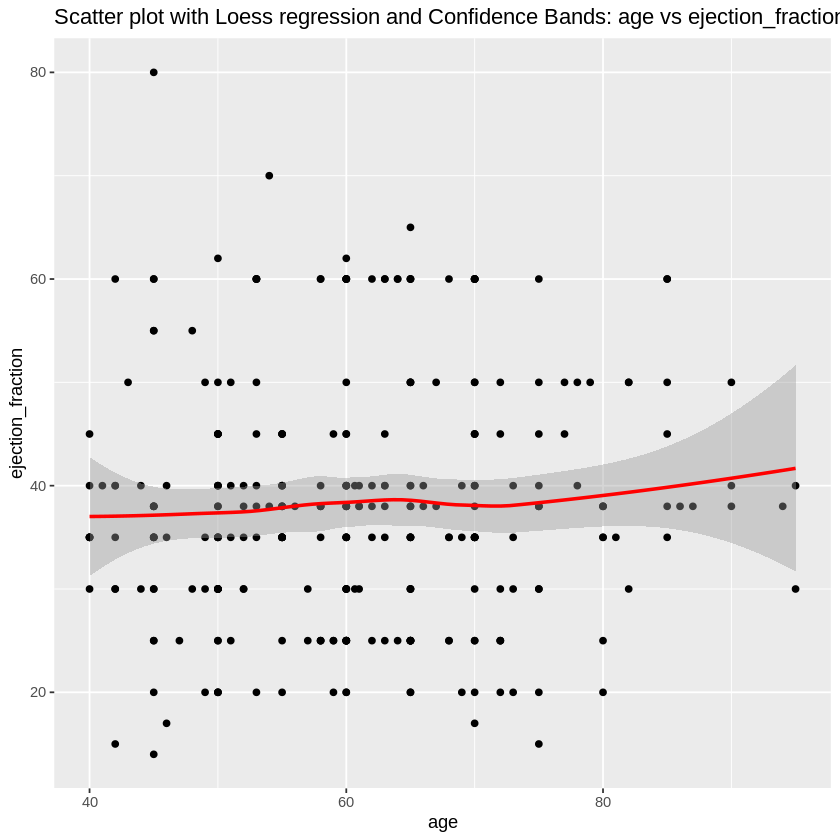

In [ ]:
library(ggplot2)
column1 <- 'age'
column2 <- 'ejection_fraction'

# Create a scatter plot with loess regression line and shaded confidence bands
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = TRUE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression and Confidence Bands:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


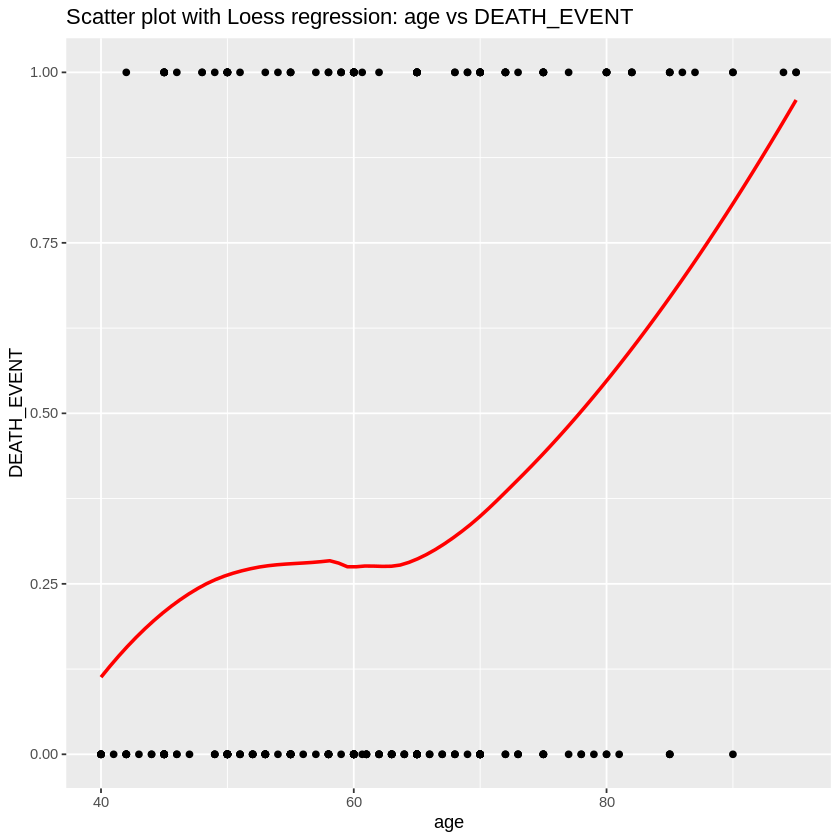

In [ ]:
# Assuming 'heart_data' is your data frame
library(ggplot2)

# Choose two columns for visualization
column1 <- 'age'
column2 <- 'DEATH_EVENT'

# Create a scatter plot with loess regression line for binary outcome
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))


`geom_smooth()` using formula = 'y ~ x'


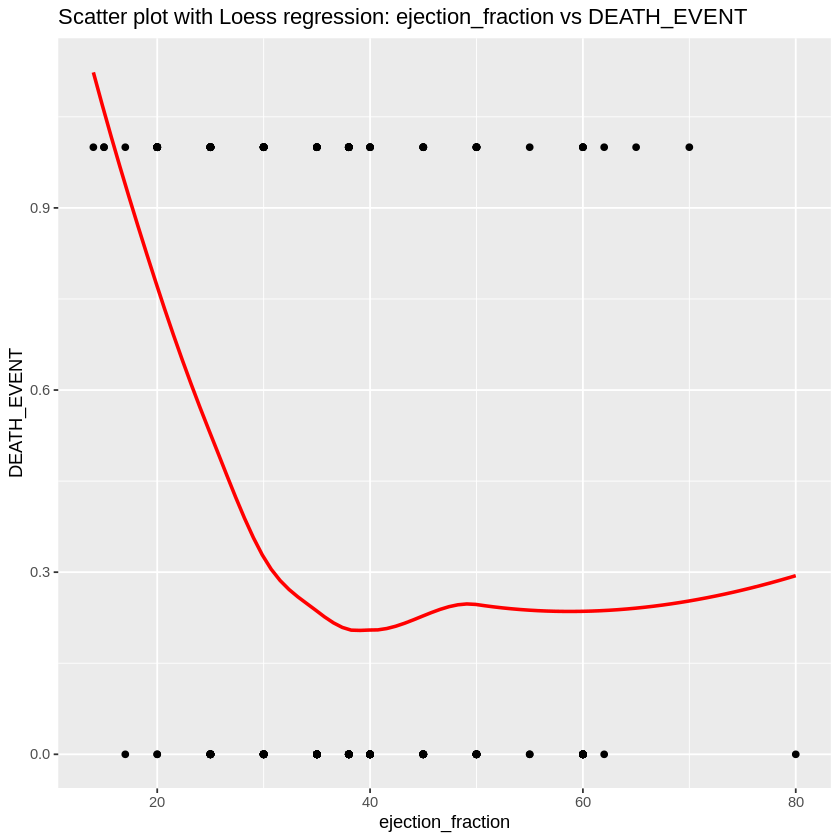

In [ ]:
library(ggplot2)

# Choose two columns for visualization
column1 <- 'ejection_fraction'
column2 <- 'DEATH_EVENT'

# Create a scatter plot with loess regression line for binary outcome
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))

`geom_smooth()` using formula = 'y ~ x'


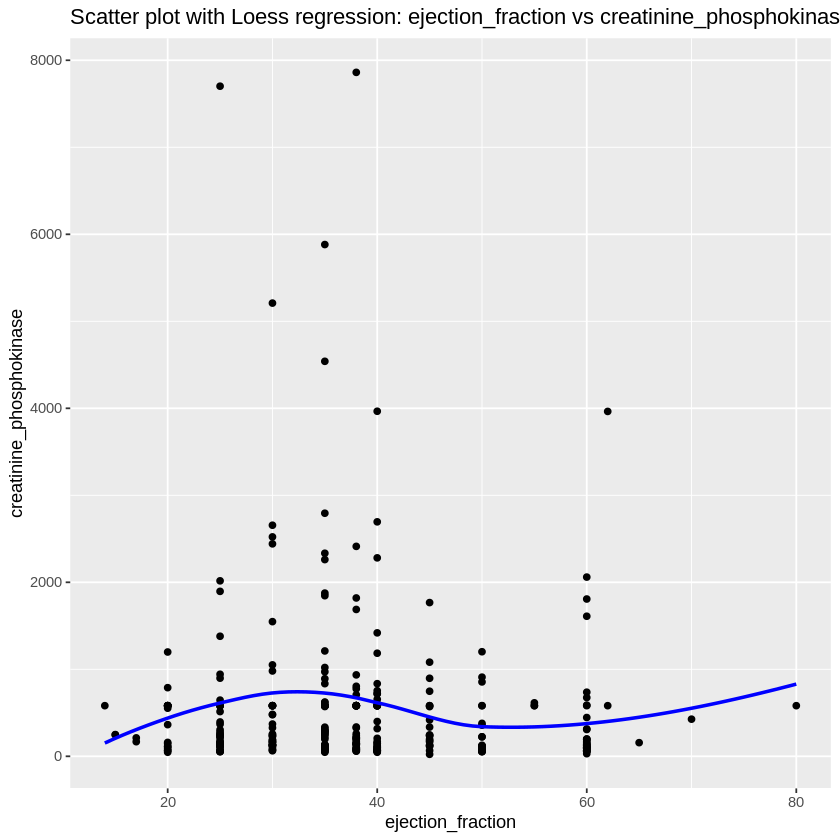

In [ ]:
# Assuming 'heart_data' is your data frame
library(ggplot2)

# Choose two columns for visualization
column1 <- 'ejection_fraction'
column2 <- 'creatinine_phosphokinase'


# Create a scatter plot with loess regression line
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, color = 'blue') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression:', column1, 'vs', column2))


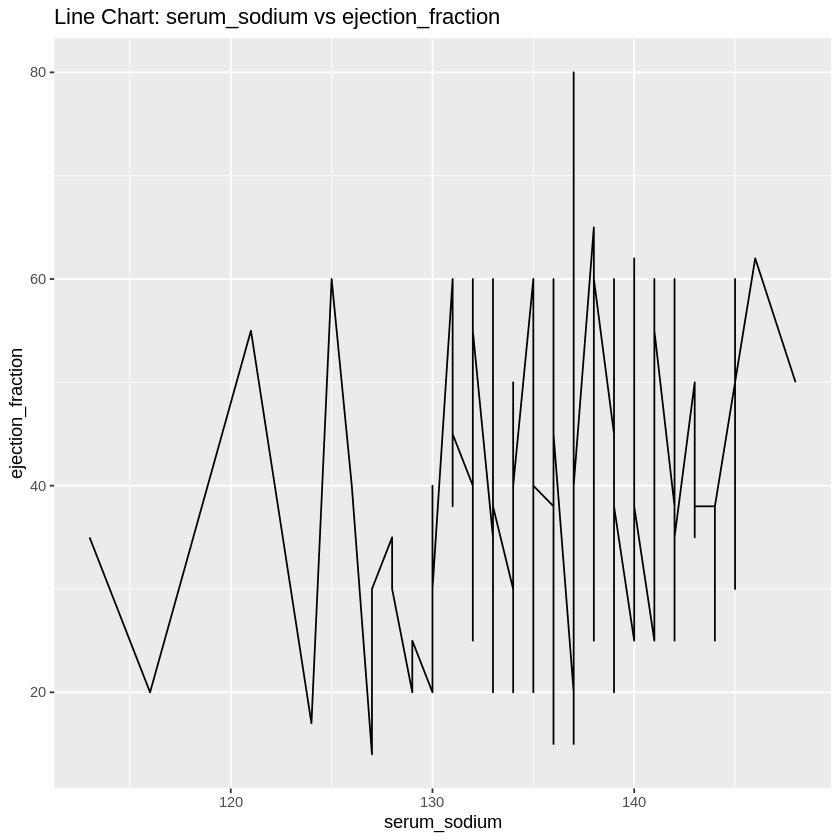

In [ ]:
library(ggplot2)
column1 <- 'serum_sodium'
column2 <- 'ejection_fraction'

# Create a line chart
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_line() +
  labs(x = column1, y = column2, title = paste('Line Chart:', column1, 'vs', column2))


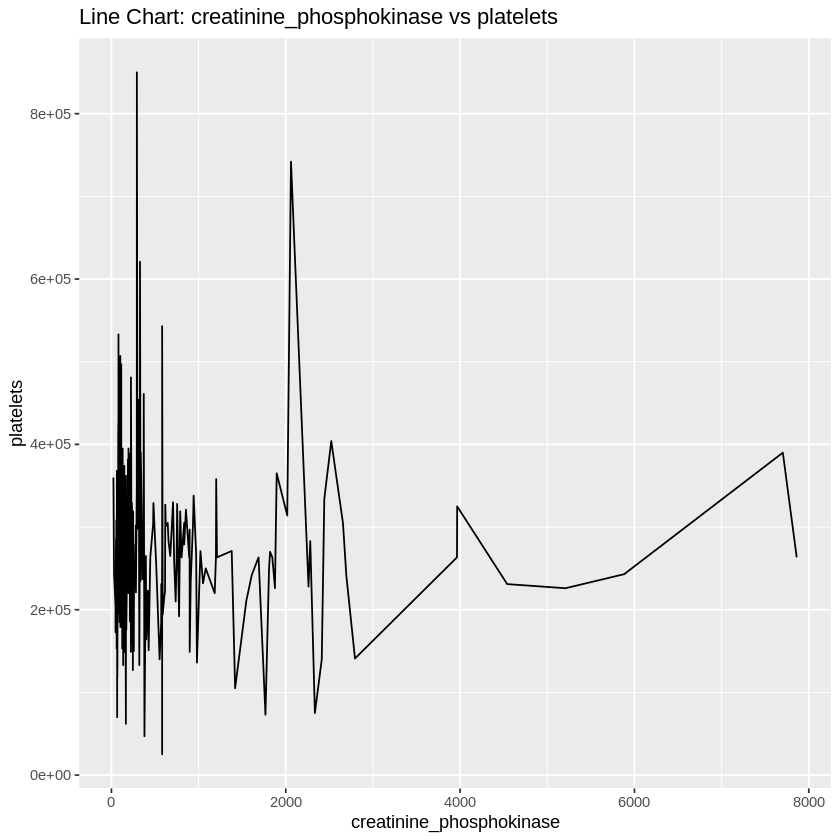

In [ ]:
# Assuming 'heart_data' is your data frame
library(ggplot2)

# Choose two columns for visualization
column1 <- 'creatinine_phosphokinase'
column2 <- 'platelets'

# Create a line chart
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_line() +
  labs(x = column1, y = column2, title = paste('Line Chart:', column1, 'vs', column2))


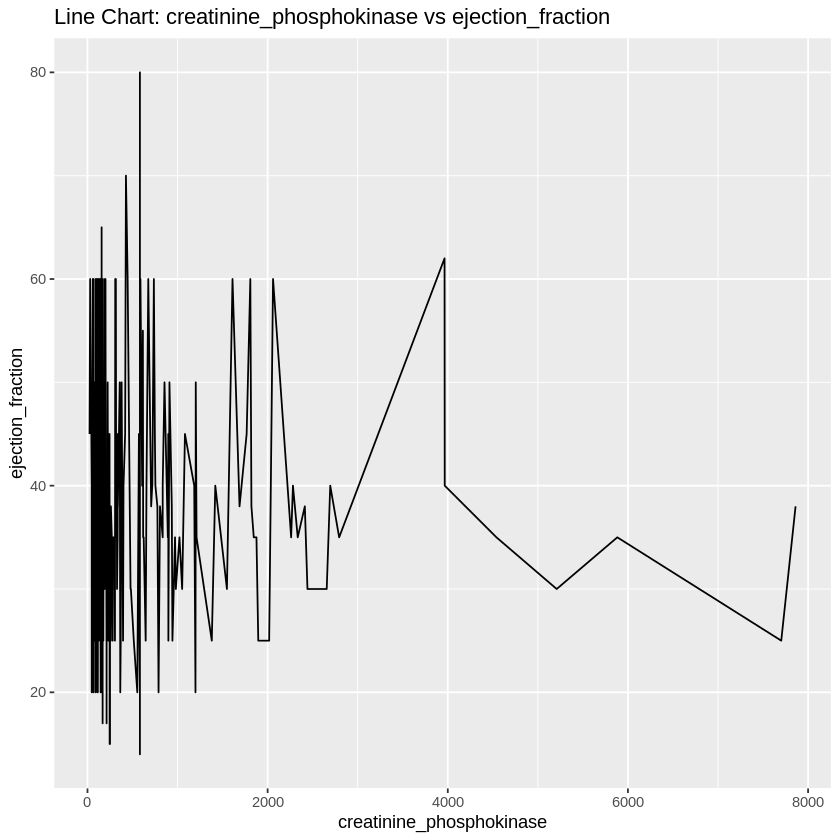

In [ ]:
library(ggplot2)

# Choose two columns for visualization
column1 <- 'creatinine_phosphokinase'
column2 <- 'ejection_fraction'

# Create a line chart
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_line() +
  labs(x = column1, y = column2, title = paste('Line Chart:', column1, 'vs', column2))


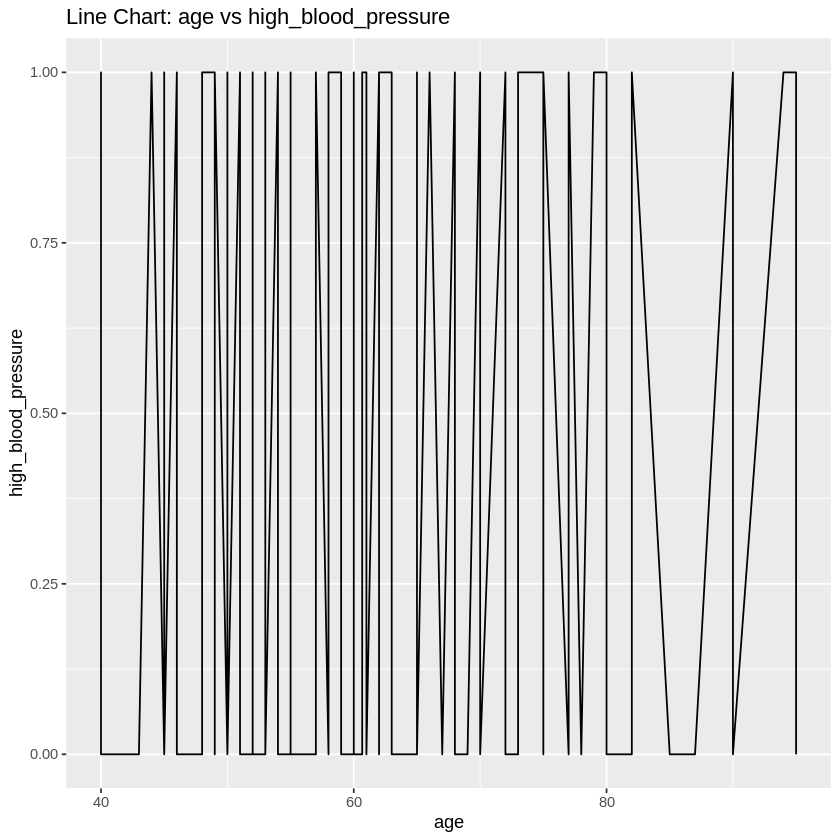

In [ ]:
library(ggplot2)

# Choose two columns for visualization
column1 <- 'age'
column2 <- 'high_blood_pressure'

# Create a line chart
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_line() +
  labs(x = column1, y = column2, title = paste('Line Chart:', column1, 'vs', column2))

`geom_smooth()` using formula = 'y ~ x'


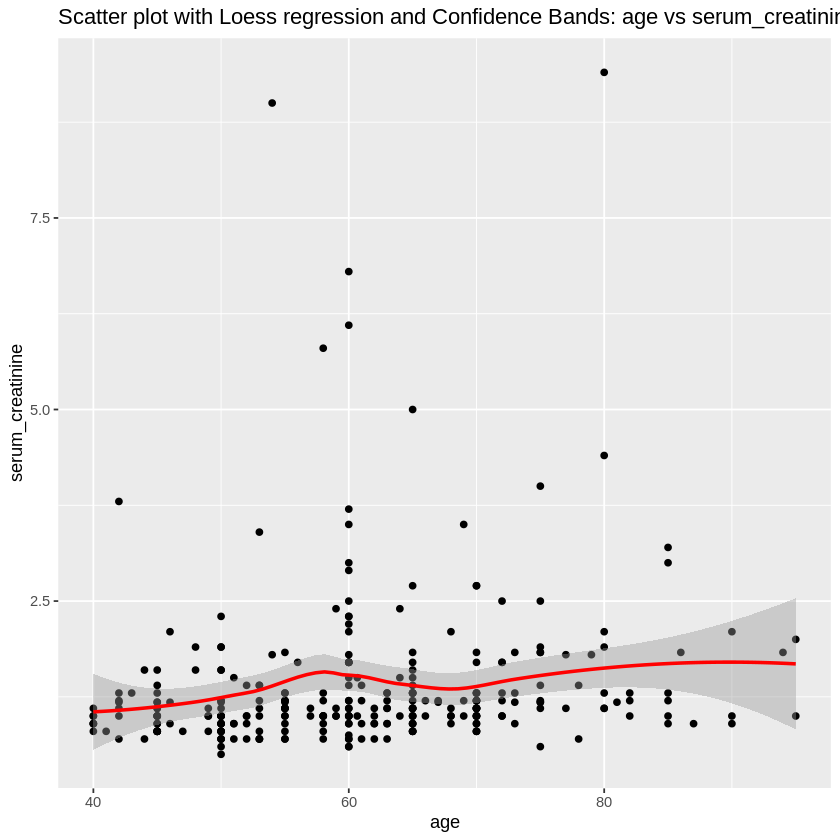

In [ ]:
library(ggplot2)
column1 <- 'age'
column2 <- 'serum_creatinine'
# Create a scatter plot with loess regression line and shaded confidence bands
ggplot(heart_data, aes(x = !!sym(column1), y = !!sym(column2))) +
  geom_point() +
  geom_smooth(method = 'loess', se = TRUE, color = 'red') +
  labs(x = column1, y = column2, title = paste('Scatter plot with Loess regression and Confidence Bands:', column1, 'vs', column2))
